# Homework #1

1. create a dataloader to load the galaxy10 dataset
2. build a classifier with a fully connceted neural network 
3. write a function to compute the classification accuracy of the network prediction
3. write a training loop and train the model
4. save the loss and accuracy for both the training dataset and the validation dataset after every epoch
5. plot the loss and accuracy
6. save the trained model and model source code (in a .py file)
7. email the trained model to jonathan.shlomi@weizmann.ac.il

In [5]:
!unzip /content/Dataset.zip -d /content/Dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/Dataset/validation/class3_1739.png  
  inflating: /content/Dataset/Dataset/validation/class2_279.png  
  inflating: /content/Dataset/Dataset/validation/class2_4655.png  
  inflating: /content/Dataset/Dataset/validation/class0_2288.png  
  inflating: /content/Dataset/Dataset/validation/class0_4821.png  
  inflating: /content/Dataset/Dataset/validation/class0_1781.png  
  inflating: /content/Dataset/Dataset/validation/class3_3890.png  
  inflating: /content/Dataset/Dataset/validation/class1_3828.png  
  inflating: /content/Dataset/Dataset/validation/class2_4899.png  
  inflating: /content/Dataset/Dataset/validation/class2_3648.png  
  inflating: /content/Dataset/Dataset/validation/class2_4127.png  
  inflating: /content/Dataset/Dataset/validation/class1_5.png  
  inflating: /content/Dataset/Dataset/validation/class4_2725.png  
  inflating: /content/Dataset/Dataset/validation/class4_2043.png  
  inflating: /c

In [0]:
path_to_training_data = '/content/Dataset/Dataset/train/'
path_to_validation_data = '/content/Dataset/Dataset/validation/'

### The galaxy10 dataset

in this homework you will build a classifier for the galaxy10 dataset (https://astronn.readthedocs.io/en/latest/galaxy10.html)

but its a "special" version of the dataset created for this homework. The images have been converted to grayscale, and saved as png files in two directories, "train" and "validation". There is a seperate test dataset in a secret location, you will train a model, submit it, and we will evaluate it on the test dataset

you can submit the model once you have over 65% accuracy on the validation dataset. 


### DataLoader:

In [51]:
#first we get a list of the files in the directory

import glob
#glob gives you a list of file paths to the images
filelist = glob.glob(path_to_training_data+'/*.png')

#lets print the first 10 entries:
filelist[:10]

['/content/Dataset/Dataset/train/class0_3153.png',
 '/content/Dataset/Dataset/train/class1_2118.png',
 '/content/Dataset/Dataset/train/class1_909.png',
 '/content/Dataset/Dataset/train/class2_438.png',
 '/content/Dataset/Dataset/train/class1_4374.png',
 '/content/Dataset/Dataset/train/class1_3912.png',
 '/content/Dataset/Dataset/train/class2_6793.png',
 '/content/Dataset/Dataset/train/class2_3267.png',
 '/content/Dataset/Dataset/train/class4_21.png',
 '/content/Dataset/Dataset/train/class0_1568.png']

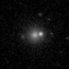

In [52]:
#to load a single image, use the PIL (python image library) function Image
from PIL import Image

Image.open(filelist[1])

In [53]:
#we want to turn it into a pytorch tensor, 
#and flatten it (since we want to train a fully connceted network)
from torchvision import datasets, transforms

img = Image.open(filelist[52])

transforms.ToTensor()( img ).view(-1)

tensor([0.0275, 0.0196, 0.0157,  ..., 0.0118, 0.0235, 0.0353])

In [54]:
## we want to normalize our inputs, to have mean pixel value of 0 and standard deviation 1
import numpy as np


lots_of_images = np.concatenate( [transforms.ToTensor()(Image.open(x)).view(-1) for x in filelist[:1000]] )
print(np.mean(lots_of_images),np.std(lots_of_images))

0.09202617 0.12522231


In [55]:
#to determine the class label of an image, just look at its name:

filelist[:5]

['/content/Dataset/Dataset/train/class0_3153.png',
 '/content/Dataset/Dataset/train/class1_2118.png',
 '/content/Dataset/Dataset/train/class1_909.png',
 '/content/Dataset/Dataset/train/class2_438.png',
 '/content/Dataset/Dataset/train/class1_4374.png']

In [0]:
## we generate numerical labels based on the file name
import torch

labels = np.zeros(len(filelist))

for class_i in range(10):
    labels[ np.array(['class'+str(class_i) in x for x in filelist]) ] = class_i
    
#the labels need to be converted to torch.LongTensor for multi-class classification
#see the documentation at https://pytorch.org/docs/stable/nn.html#crossentropyloss
labels = torch.LongTensor(labels)

labels

## now, write a custom dataloader for the dataset 
remember to flatten the image to a vector of length 69*69

In [0]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, path,mean=0.092,std=0.127,n_classes=10):
        
        
        self.mean = mean
        self.std = std
        self.filelist = glob.glob(path+'/*.png') 
        self.labels = np.zeros(len(self.filelist))
        for class_i in range(n_classes):
          self.labels[ np.array(['class'+str(class_i) in x for x in self.filelist]) ] = class_i
        self.labels = torch.LongTensor(self.labels)
        
    def __len__(self):
       
        return len(self.filelist)


    def __getitem__(self, idx):
        
        img = Image.open(self.filelist[idx])
        x = transforms.ToTensor()(img).view(-1)
        
        x = (x-self.mean)/self.std
        
        y = self.labels[idx]
    
        return x, y

## you should get something that works like this:

In [0]:
training_ds = CustomDataset(path_to_training_data)
validation_ds = CustomDataset(path_to_validation_data)

In [57]:
some_random_idx = 52
training_ds[some_random_idx]


(tensor([-0.5083, -0.5700, -0.6009,  ..., -0.6318, -0.5391, -0.4465]),
 tensor(2))

In [0]:
## lets also go ahead and create the data loaders,
## and set the batch size
training_dataloader = DataLoader(training_ds,batch_size=120)
valid_dataloader = DataLoader(validation_ds,batch_size=120)

## lets plot some examples from each class

this should work if your dataloader is implemented properly

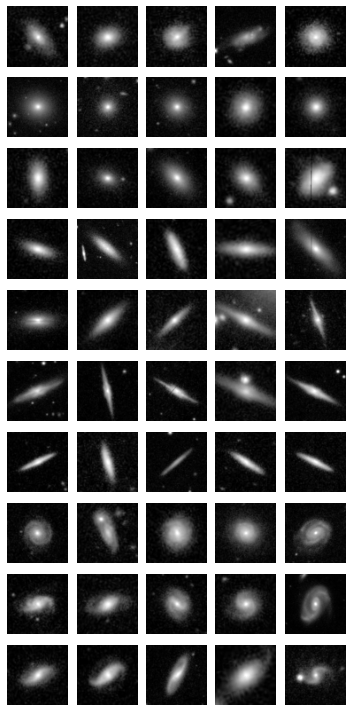

In [59]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(10,5,figsize=(5,10))


for class_i in range(10):
    idxs = np.where( training_ds.labels == class_i )[0]
    idxs = np.random.permutation(idxs)
    for plot_i in range(np.min([5,len(idxs)])):

        ax[class_i][plot_i].imshow(training_ds[idxs[plot_i]][0].reshape(69,69),cmap='gray')
        ax[class_i][plot_i].set_axis_off()
        
plt.tight_layout()
plt.show()

# Now lets build the neural network

its a classifier - it takes as input 69*69 numbers, and outputs 10 numbers

In [0]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(69*69, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512,512)
        self.fc4 = nn.Linear(512,512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512,10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.droput = nn.Dropout(0.2)
        
    def forward(self,x):
        # flatten image input
        x = x.view(-1,69*69)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.droput(x)
         # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))

        x = F.relu(self.fc4(x))
        # add dropout layer
        x = self.droput(x)
        # add output layer
        x = self.fc3(x)
        return x
#class Net(nn.Module):
     
     #def __init__(self):
       #super(Net,self).__init__()
       #hidden_1 = 512
       #self.layer1 = nn.Linear(69*69,512)
       
       #self.layer2 = nn.Linear(512,10)
     #def forward(self,x):
      # x = x.view(-1,69*69) , #flatten the image input
       #x = F.relu(self.layer1(x))
       #x = self.layer2(x)
      # return x

In [60]:
## create the instance

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=4761, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)


In [0]:
import torch.cuda
if torch.cuda.is_available():
    net.cuda()

In [0]:
loss_func = nn.CrossEntropyLoss()

## We want to create a function that will compute the loss and accuracy at the end of each epoch

since this is a small dataset, we don't have a memory constraint and its easy to evaluate on the whole dataset at once

In [0]:
training_tensor = torch.stack([training_ds[i][0] for i in range(len(training_ds)) ])
training_labels = training_ds.labels.data.numpy()

validation_tensor = torch.stack([validation_ds[i][0] for i in range(len(validation_ds)) ])
validation_labels = validation_ds.labels.data.numpy()


accuracy is defined as the number of correctly classifier samples out of the whole dataset

In [0]:
def dataset_accuracy(tensor_dataset,targets,net,loss_func):

    net.eval()

    output = net(tensor_dataset)
    
    
    #loss = loss_func(output,torch.LongTensor(targets))
    loss = loss_func(output,targets)

    output = output.cpu().data.numpy()
    prediction = np.argmax(output,axis=1)

    n_correct = len(np.where(targets==prediction)[0])
    n_total = len(targets)

    return n_correct/n_total, loss.item()

In [64]:
training_labels = training_ds.labels
training_tensor = training_tensor.cuda()
training_labels = training_labels.cuda()
dataset_accuracy(training_tensor,training_labels, net, loss_func)

(0.0, 2.312394380569458)

In [0]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01) 

In [67]:
from tqdm.notebook import tqdm

n_epochs = 50


loss_vs_epoch = []
accuracy_vs_epoch = []

for epoch in tqdm( range(n_epochs) ):
  training_loss = 0
  validation_loss =0
  net.train()
  for x,y in training_dataloader:
    if torch.cuda.is_available():
      x,y = x.cuda(),y.cuda()
      #clear the grade of all optimzed variables 
      optimizer.zero_grad()
      output = net(x)
      #print(y)
      #print(output)
      #calculate the loss 
      loss = loss_func(output,y)
      print(loss.item())
      print(x.size(0))
      loss.backward()
      optimizer.step()
      training_loss += loss.item() * x.size(0)
      print(training_loss)
      training_accuracy = dataset_accuracy(x,y,net,loss_func)
    
  net.eval()
  for x,y in valid_dataloader:
    if torch.cuda.is_available():
      x,y = x.cuda(),y.cuda()
      # forward pass: compute predicted outputs by passing inputs to the model
      output = net(x)   # calculate the loss
      loss = loss_func(output,y) # update running validation loss 
      validation_loss += loss.item() * x.size(0)
      validation_accuracy = dataset_accuracy(x,y,net,loss_func)

  loss_vs_epoch.append([training_loss, validation_loss])
  accuracy_vs_epoch.append([training_accuracy,validation_accuracy])

Streaming output truncated to the last 5000 lines.
0.9549621939659119
120
1478.9840769767761
0.8578090071678162
120
1581.921157836914
0.9092084169387817
120
1691.0261678695679
0.8439270853996277
120
1792.2974181175232
0.8384390473365784
120
1892.9101037979126
0.8070358633995056
120
1989.7544074058533
0.8872506618499756
120
2096.2244868278503
0.9928298592567444
120
2215.3640699386597
0.9178168773651123
120
2325.502095222473
0.7551051378250122
120
2416.1147117614746
0.9433400630950928
120
2529.3155193328857
0.8315132260322571
120
2629.0971064567566
0.8777360320091248
120
2734.4254302978516
0.7108317613601685
120
2819.725241661072
0.8402949571609497
120
2920.5606365203857
0.7145541906356812
120
3006.3071393966675
0.7021241784095764
120
3090.5620408058167
0.8446074724197388
120
3191.9149374961853
0.7873001098632812
120
3286.390950679779
0.7400462031364441
120
3375.1964950561523
0.7089633941650391
120
3460.272102355957
0.6843580603599548
120
3542.3950695991516
0.724541425704956
120
3629.340

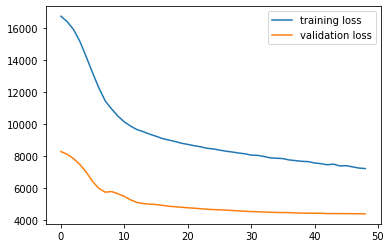

In [68]:
loss_vs_epoch = np.array(loss_vs_epoch)

plt.plot(loss_vs_epoch[:,0][1:],label='training loss')
plt.plot(loss_vs_epoch[:,1][1:],label='validation loss')

plt.legend()

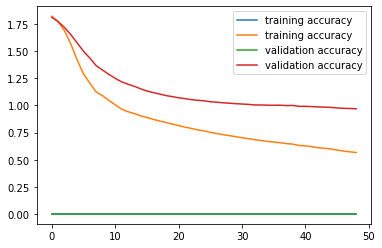

In [69]:
accuracy_vs_epoch = np.array(accuracy_vs_epoch)

plt.plot(accuracy_vs_epoch[:,0][1:],label='training accuracy')
plt.plot(accuracy_vs_epoch[:,1][1:],label='validation accuracy')

plt.legend()

## save your model

In [0]:
torch.save(net.state_dict(), 'model.pt')

## Bonus round: data augmentation

implement this random rotation into your dataset object - but add an optional input argument to your dataset __init__ so that you can turn this on/off (only use data augmentation for the training dataset)

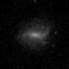

In [0]:
Image.open(filelist[1242])

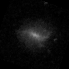

In [0]:
transforms.RandomRotation(180)( Image.open(filelist[1242]) )